# Biodiversity in National Parks

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

## Project Objectives:
- Complete a project to add to your portfolio
- Use Jupyter Notebook to communicate findings
- Run an analysis on a set of data
- Become familiar with data analysis workflow

## Prerequisites:
- Data Visualization
- Communicating Data Science Findings

In [1]:
# Load the Libraries
import csv # Python library used for reading and writing tabular data in CSV format.
import pandas as pd # Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import json # Python library for encoding and decoding custom objects by using JSON encoder and decoder classes.
import numpy as np # Python library for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import seaborn as sns #Python library for statistical visualizations
import statistics as stat #Python library for statistical operations
import matplotlib.pyplot as plt # Python library for creating graphs
from scipy import stats # Python library for linear regression

## The Observations Dataset

In [2]:
# Load the Data
observations = pd.read_csv("observations.csv")

# Inspect the Data
print("Head of Observations")
print(observations.head(), "\n")
print("Info of Observations")
print(observations.info(), "\n")
print("Null Values of Observations")
print(observations.isnull().sum(), "\n")

# Find the Value Counts of the National Parks
print("Value Counts of National Parks in Observations")
print(observations["park_name"].value_counts())

Head of Observations
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 

Info of Observations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None 

Null Values of Observations
scientific_name    0
park_name          0
observations       0

We have two datasets to explore, `observations` and `species_info`. 

`observations` contains 3 variables: 
1. `scientific_name` - the scientific name of each species
2. `park_name` - the National Park where the specific species were found
3. `observations` - the number of times each species was observed at the National Park

The `observations` datset contains 23,296 recorded sightings of different species at several national parks for the past 7 days. It doesn't appear to have any null observations.

The `observations` dataset also contains an equal sampling of sightings from each National Park at 5,824 observations each for `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park`, and `Yellowstone National Park`. 

## The Species Info Dataset

In [71]:
# Load the Data
species_info = pd.read_csv("species_info.csv")

# Inspect the Data
print("Head of Species Info")
print(species_info.head(), "\n")
print("Info of Species Info")
print(species_info.info(), "\n")
print("Null Values of Species Info")
print(species_info.isnull().sum(), "\n")

# Find the Value Counts of the National Parks
print("Value Counts of Category in Species Info")
print(species_info["category"].value_counts(), "\n")

# Find the Value Counts of Each Unique Species
print("Value Counts of Each Species")
print(species_info["scientific_name"].value_counts())

Head of Species Info
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   

Info of Species Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 

`species_info` contains 4 variables: 
1. `category` - the class of the animal
2. `scientific_name` - the scientific name of each species
3. `common_name` - the common name of each species
4. `conservation_status` - the species' current conservation status

The `species_info` dataset contains 5,823 observations. It also contains 5,633 `NaN` values, all of which are within the `conservation_status` variable. We will have to dig deeper to determine what are the type of these NaN values.

We also showcase the value counts of each `category` and `scientific_name` in `species_info`. The `category` shows that there are plant and animal life within the dataset. However, the `scientific_name` shows that there are duplicate rows to consider when conducting our analyses. 

In [83]:
# Find the Value Counts for Each Unique Species in Species_Info
value_counts_species = species_info.scientific_name.value_counts()
# Find the Names of Each Species with Duplicates
duplicates = value_counts_species[value_counts_species > 1].index.tolist()
print("There are " + str(len(duplicates)) + " duplicate rows in our 'species_info' dataset.", "\n") # 274

# Create a DataFrame that Showcases the Duplicate Rows
duplicates_df = species_info[species_info.scientific_name.isin(duplicates)].sort_values(by = "scientific_name").head(15)
print("Head of Duplicated Rows")
print(duplicates_df.head())

There are 274 duplicate rows in our 'species_info' dataset. 

Head of Duplicated Rows
            category      scientific_name  \
5553  Vascular Plant  Agrostis capillaris   
2132  Vascular Plant  Agrostis capillaris   
2134  Vascular Plant    Agrostis gigantea   
5554  Vascular Plant    Agrostis gigantea   
4178  Vascular Plant   Agrostis mertensii   

                              common_names conservation_status  
5553     Colonial Bent, Colonial Bentgrass                 NaN  
2132                     Rhode Island Bent                 NaN  
2134                                Redtop                 NaN  
5554   Black Bent, Redtop, Water Bentgrass                 NaN  
4178  Arctic Bentgrass, Northern Bentgrass                 NaN  


We found that there are 274 duplicate rows in `species_info`, and the duplication is found specifically in `scientific_name`. The duplication is caused by a species having `common_names`. For example, the **Agrostis capillaris** is known as **Colonial Bent**, **Colonial Bentgrass**, and **Rhode Island Bent**.

We will not be conducting any analyses on the `common_names` variable, so we will drop duplicate values from `species_info`.

In [85]:
# Drop Duplicate Rows Based on Scientific Name
species_info = species_info.drop_duplicates(subset = ["scientific_name"])

# Inspect the Data
print("Head of Species Info")
print(species_info.head(), "\n")
print("Info of Species Info")
print(species_info.info(), "\n")
print("Null Values of Species Info")
print(species_info.isnull().sum(), "\n")

# Find the Value Counts of the National Parks
print("Value Counts of Category in Species Info")
print(species_info["category"].value_counts(), "\n")

# Find the Value Counts of Each Unique Species
print("Value Counts of Each Species")
print(species_info["scientific_name"].value_counts())

Head of Species Info
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   

Info of Species Info
<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-n

Our data cleaning resulted in a loss of 282 rows of data, specifically bringing `species_info` from 5,823 observations to 5,541 observations. In addition, with the exception of **Nonvascular Plant**s, each `category` in `species_info` lost some data.

Old `Category` Data
```
Vascular Plant       4470 
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
```

New `Category` Data
```
Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
```

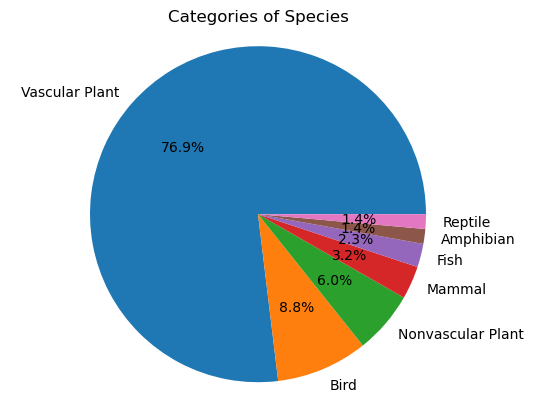

In [90]:
# Obtain the Value Counts of the Categories
value_counts = species_info.category.value_counts()
categories = value_counts.index.tolist()

# Plot the Pie Chart for Species Info Category
plt.pie(value_counts,
       autopct = "%.1f%%",
       labels = categories)

# Create Labels for the Plot
plt.axis("equal")
plt.title("Categories of Species")

# Show and Close the Plot
plt.show()
plt.close()

We see that plant life (`Vascular Plant` at 76.9% and `Nonvascular Plant` at 6.0%) make up 82.9% of the species in our data. It is followed by `Bird` with 8.8% and `Mammal` at 3.2%. `Fish` is 2.3% of the data, and `Amphibian` and `Reptile` each have 1.4% of the data.

In [5]:
# Inspect the NaN Values
print("Head of Non-NaN Values of Species Info")
print(species_info.dropna().head(), "\n")

# Value Counts of Non-NaN Values
print("Value Counts of Non-NaN Values of Species Info")
print(species_info.dropna().conservation_status.value_counts())

Head of Non-NaN Values of Species Info
   category            scientific_name       common_names conservation_status
7    Mammal              Canis latrans             Coyote  Species of Concern
8    Mammal                Canis lupus          Gray Wolf          Endangered
9    Mammal                Canis rufus           Red Wolf          Endangered
29   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern 

Value Counts of Non-NaN Values of Species Info
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


The `NaN` values of `species_info` seem to be of type **Missing Not at Random** (**MNAR**). We believe it to be **MNAR** data because the observations with `NaN` values within the `conservation_status` column contain healthy population numbers and are not on the [endangered list](https://wildanimalhealthfund.org/animalhealth/why-are-animals-endangered/?gad_source=1&gclid=CjwKCAjwt-OwBhBnEiwAgwzrUkErNJJgf_6llpdWnLeGySjxY4_M9HL0Jw3RJ7tMNPO2aFhFB0u4DRoCgewQAvD_BwE). We do not have information for how this dataset was collected and compiled as it was provided by Codecademy's Data Science Portfolio Project. Therefore, we will assume that this specific column's `NaN` values are of **MNAR** type.

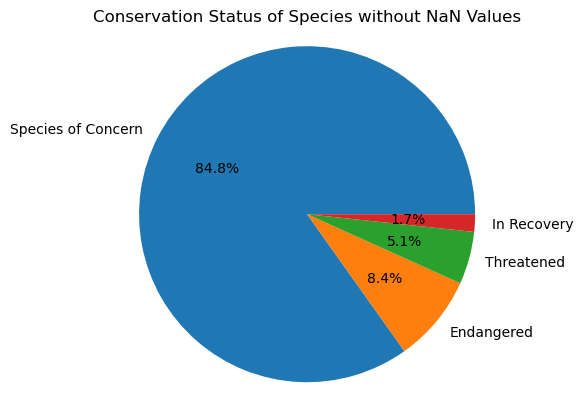

In [91]:
# Obtain the Value Counts
value_counts = species_info.conservation_status.value_counts()
categories = value_counts.index.tolist()

# Pie Chart for Conservation Status
plt.pie(value_counts,
       autopct = "%.1f%%",
       labels = categories)

# Create Labels for the Plot
plt.axis("equal")
plt.title("Conservation Status of Species without NaN Values")

# Show and Close the Plot
plt.show()
plt.close()

Using our **domain knowledge** that the `NaN` values within `species_info`'s `conservation_status` are most likely wildlife that are not on the endangered list, we will create a new column, `endangered_list`, to indicate whether the specific species has a conservation status designation. If `conservation_status` is the `NaN` value, then we will assume that species is `Not Endangered`.

In [92]:
# Use a Lambda Function to Find the NaN and Assign as "Not On Conservation List"
species_info["endangered_list"] = species_info["conservation_status"].apply(lambda x: "Not On the Conservation List" if pd.isna(x) else "On the Conservation List")

# Display the Value Counts
print("Value Counts of Non-NaN Values of Species Info")
print(species_info.endangered_list.value_counts())

Value Counts of Non-NaN Values of Species Info
endangered_list
Not On the Conservation List    5363
On the Conservation List         178
Name: count, dtype: int64


Here, we see that there are 5,363 species that do not have a conservation status designation, denoted as `Not Endangered`, and there are 178 species that have a conservation status designation ranging from `Species of Concern`, `Endangered`, `Threatened`, or `In Recovery`. 

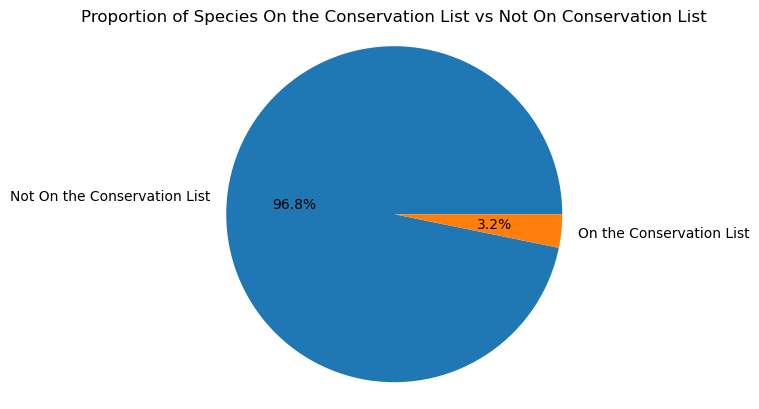

In [93]:
# Pie Chart for Conservation Status
plt.pie(species_info.endangered_list.value_counts(),
       autopct = "%.1f%%",
       labels = species_info.endangered_list.dropna().unique())

# Create Labels for the Plot
plt.axis("equal")
plt.title("Proportion of Species On the Conservation List vs Not On Conservation List")

# Show and Close the Plot
plt.show()
plt.close()

Above, we see that 96.8% of the species in our dataset are `Not On the Conservation List` and 3.2% are `On the Conservation List`. 

Let's explore the species specifically `On the Conservation List` with respect to the `category`.

In [94]:
# Define a Function to Create a Pie Chart for Species on the Conservation List
def make_pie_category_conservation(species):
    # Create a DataFrame to Isolate for Desired Species
    df = species_info[species_info.category == species]
    df = df[df.endangered_list == "On the Conservation List"]
    
    # Obtain the Value Counts
    value_counts = df.conservation_status.value_counts()
    categories = value_counts.index.tolist()
    
    # Define the Colors for Each Aspect of the Conservation List
    colors = ["lightblue" if category == "Species of Concern" else "lightcoral" if category == "Endangered" else "lightyellow" if category == "Threatened" else "lightgreen" for category in categories]
     
    # Create a Pie Chart
    plt.pie(value_counts,
           autopct = "%d%%",
           labels = categories,
           colors = colors)
    
    # Create Labels for the Plot
    plt.axis("equal")
    plt.title("Prop. of " + species + " On the Conservation List")

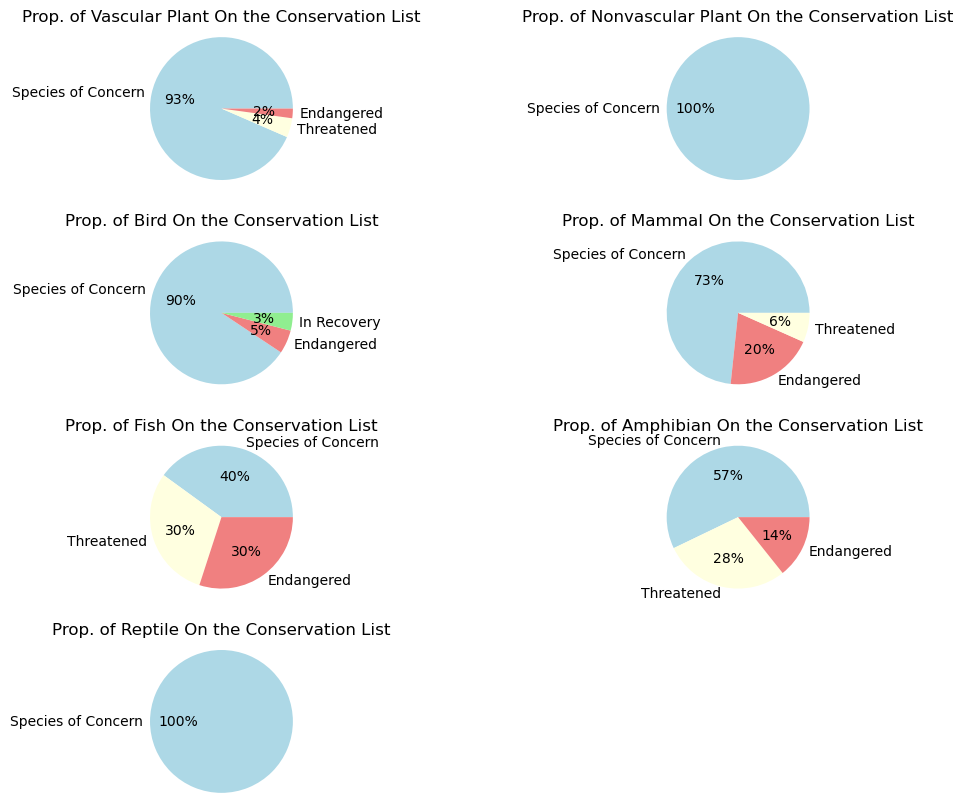

In [95]:
# Create a Figure
fig = plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 1)
plt.subplots_adjust(hspace = 0.3)

# Define the Order of the Subplots
species = ["Vascular Plant", "Nonvascular Plant", "Bird", "Mammal", "Fish", "Amphibian", "Reptile"]
# Define the Iteration Steps
x = 1

# Iterate Over the Order for Each Subplot
for animal in species:
    ax = fig.add_subplot(4, 2, x) # 4 Rows, 2 Columns, xth Subplot
    make_pie_category_conservation(animal)
    x += 1 # Add to the Increment

In [96]:
# Define a Function to Find the Top and Bottom of Observations in Terms of Frequency
def sort_observations(park, method = "ascending"):
    if method == "ascending":
        df = observations[observations.park_name == park].sort_values(by = "observations", 
                                                                      ascending = False).head()
    else:
        df = observations[observations.park_name == park].sort_values(by = "observations").head()
    return df

In [97]:
# Find the Top and Bottom of Observations in Terms of Frequency
great_smoky_top = sort_observations("Great Smoky Mountains National Park", "ascending")
great_smoky_bottom = sort_observations("Great Smoky Mountains National Park", "descending")
yosemite_top = sort_observations("Yosemite National Park", "ascending")
yosemite_bottom = sort_observations("Yosemite National Park", "descending")
bryce_top = sort_observations("Bryce National Park", "ascending")
bryce_bottom = sort_observations("Bryce National Park", "descending")
yellowstone_top = sort_observations("Yellowstone National Park", "ascending")
yellowstone_bottom = sort_observations("Yellowstone National Park", "descending")

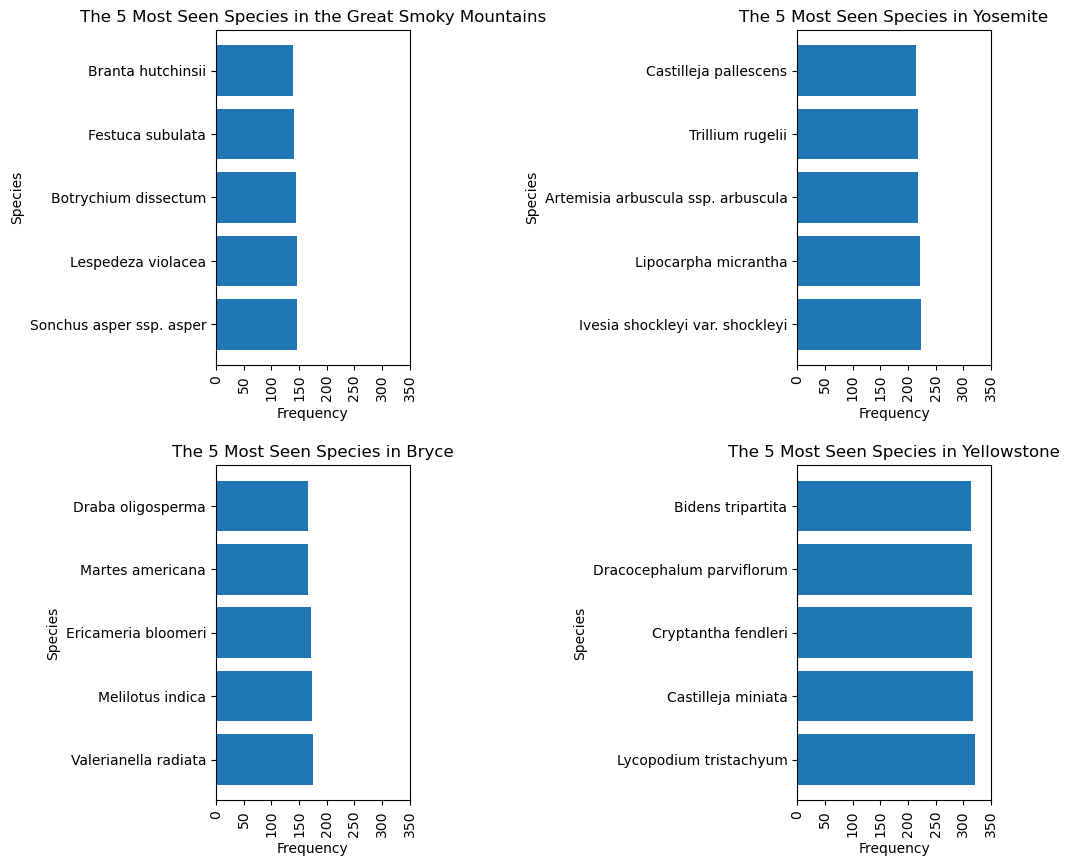

In [98]:
fig = plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 2)
plt.subplots_adjust(hspace = 0.3)

# Create the First Subplot
ax1 = fig.add_subplot(2, 2, 1) # 2 Rows, 2 Columns, 1st Subplot
# Create a Bar Graph
ax1.barh(great_smoky_top.scientific_name, great_smoky_top.observations)
# Set Title and Labels 
ax1.set_title("The 5 Most Seen Species in the Great Smoky Mountains")
ax1.set_xlabel("Frequency")
ax1.set_xlim(0, 350)
ax1.set_xticks(range(0, 351, 50))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax1.set_ylabel("Species")

# Create the Second Subplot, Top Yosemite
ax2 = fig.add_subplot(2, 2, 2) 
# Create a Bar Graph
ax2.barh(yosemite_top.scientific_name, yosemite_top.observations)
# Set Title and Labels 
ax2.set_title("The 5 Most Seen Species in Yosemite")
ax2.set_xlabel("Frequency")
ax2.set_xlim(0, 350)
ax2.set_xticks(range(0, 351, 50))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
ax2.set_ylabel("Species")

# Create the Third Subplot, Top Yosemite
ax3 = fig.add_subplot(2, 2, 3) 
# Create a Bar Graph
ax3.barh(bryce_top.scientific_name, bryce_top.observations)
# Set Title and Labels 
ax3.set_title("The 5 Most Seen Species in Bryce")
ax3.set_xlabel("Frequency")
ax3.set_xlim(0, 350)
ax3.set_xticks(range(0, 351, 50))
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
ax3.set_ylabel("Species")

# Create the Fourth Subplot, Top Yellowstone
ax4 = fig.add_subplot(2, 2, 4) 
# Create a Bar Graph
ax4.barh(yellowstone_top.scientific_name, yellowstone_top.observations)
# Set Title and Labels 
ax4.set_title("The 5 Most Seen Species in Yellowstone")
ax4.set_xlabel("Frequency")
ax4.set_xlim(0, 350)
ax4.set_xticks(range(0, 351, 50))
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 90)
ax4.set_ylabel("Species")

plt.show()
plt.close()

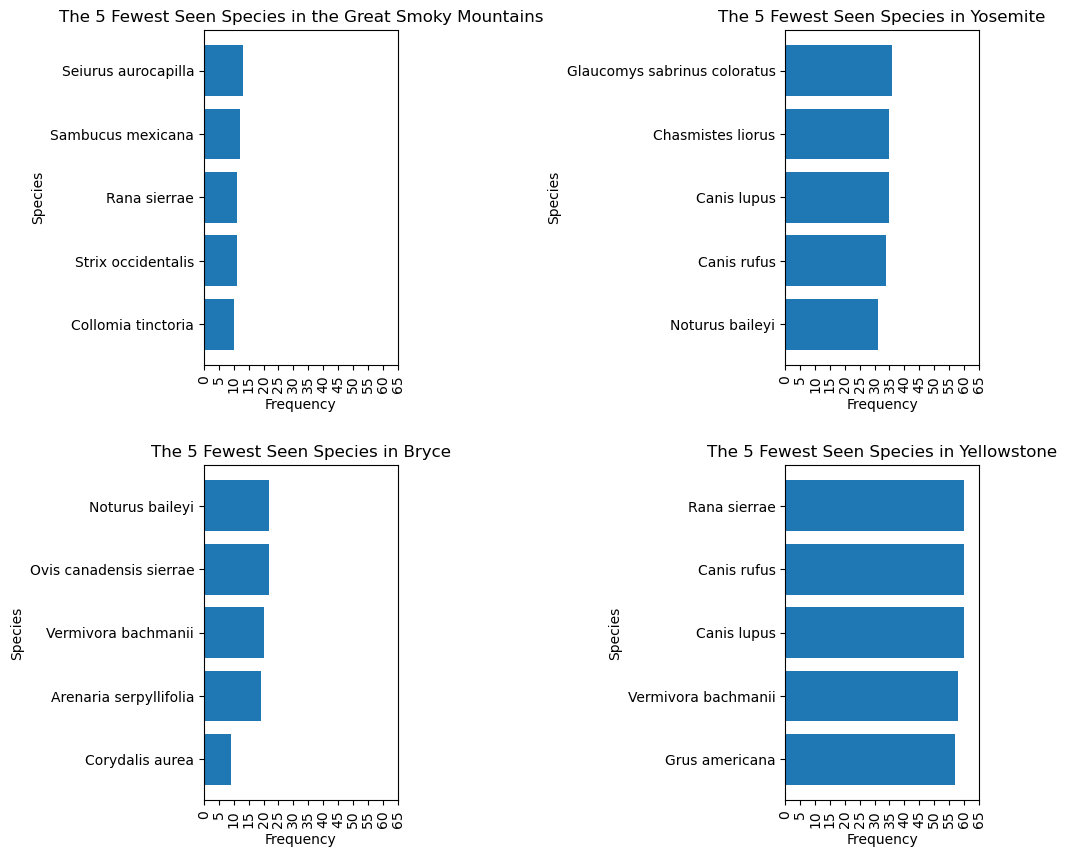

In [99]:
fig = plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 2)
plt.subplots_adjust(hspace = 0.3)

# Create the First Subplot
ax1 = fig.add_subplot(2, 2, 1) # 2 Rows, 2 Columns, 1st Subplot
# Create a Bar Graph
ax1.barh(great_smoky_bottom.scientific_name, great_smoky_bottom.observations)
# Set Title and Labels 
ax1.set_title("The 5 Fewest Seen Species in the Great Smoky Mountains")
ax1.set_xlabel("Frequency")
ax1.set_xlim(0, 65)
ax1.set_xticks(range(0, 66, 5))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax1.set_ylabel("Species")

# Create the Second Subplot, Top Yosemite
ax2 = fig.add_subplot(2, 2, 2) 
# Create a Bar Graph
ax2.barh(yosemite_bottom.scientific_name, yosemite_bottom.observations)
# Set Title and Labels 
ax2.set_title("The 5 Fewest Seen Species in Yosemite")
ax2.set_xlabel("Frequency")
ax2.set_xlim(0, 65)
ax2.set_xticks(range(0, 66, 5))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
ax2.set_ylabel("Species")

# Create the Third Subplot, Top Yosemite
ax3 = fig.add_subplot(2, 2, 3) 
# Create a Bar Graph
ax3.barh(bryce_bottom.scientific_name, bryce_bottom.observations)
# Set Title and Labels 
ax3.set_title("The 5 Fewest Seen Species in Bryce")
ax3.set_xlabel("Frequency")
ax3.set_xlim(0, 65)
ax3.set_xticks(range(0, 66, 5))
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
ax3.set_ylabel("Species")

# Create the Fourth Subplot, Top Yellowstone
ax4 = fig.add_subplot(2, 2, 4) 
# Create a Bar Graph
ax4.barh(yellowstone_bottom.scientific_name, yellowstone_bottom.observations)
# Set Title and Labels 
ax4.set_title("The 5 Fewest Seen Species in Yellowstone")
ax4.set_xlabel("Frequency")
ax4.set_xlim(0, 65)
ax4.set_xticks(range(0, 66, 5))
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 90)
ax4.set_ylabel("Species")

plt.show()
plt.close()

In [102]:
# Create a Master List of Unique Scientific Names of Animals in ABC Order
animals = observations.sort_values(by = "scientific_name").scientific_name.unique()

# Create an Empty List
total_seen = []

# Iterate Over Each Animal
for animal in animals:
    # Create a DataFrame that Isolates Each Animal
    df = observations[observations.scientific_name == animal]
    # Calculate the Sum Total of Observations for Each Animal
    seen_count = df.observations.sum()
    # Append the List with the Summation
    total_seen.append(seen_count)

In [70]:
no_duplicates = duplicates_df.drop_duplicates(subset = ["scientific_name"])
no_duplicates.head()

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",NaN
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",NaN
2138,Vascular Plant,Agrostis scabra,"Rough Bentgrass, Rough Hairgrass",NaN
4182,Vascular Plant,Agrostis stolonifera,"Carpet Bentgrass, Creeping Bent, Creeping Bent...",NaN


In [57]:
species_info[species_info.scientific_name == "Setaria viridis"]

,category,scientific_name,common_names,conservation_status
2307,Vascular Plant,Setaria viridis,"Green Bristle Grass, Green Foxtail",NaN
4281,Vascular Plant,Setaria viridis,"Bottle Grass, Green Bristle Grass, Green Brist...",NaN


In [21]:
print(len(total_seen))

5541


In [22]:
print(len(observations.scientific_name.unique()))

5541


In [23]:
print(len(species_info.scientific_name.unique()))

5541


In [103]:
species_info["total_seen"] = total_seen

In [105]:
species_info[species_info.endangered_list == "On the Conservation List"].head()

,category,scientific_name,common_names,conservation_status,endangered_list,total_seen
7,Mammal,Canis latrans,Coyote,Species of Concern,On the Conservation List,600
8,Mammal,Canis lupus,Gray Wolf,Endangered,On the Conservation List,575
9,Mammal,Canis rufus,Red Wolf,Endangered,On the Conservation List,560
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,On the Conservation List,614
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,On the Conservation List,589


In [61]:
animals = observations.sort_values(by = "scientific_name").scientific_name.unique()
print(len(animals))

5541


In [ ]:
species_info.head()